In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Step1: Data Preprocessing

In [2]:
df = pd.read_excel('LR.xlsx')
df.head()

,Height,Weight
0,120,47
1,135,58
2,123,48
3,145,60
4,160,70


In [3]:
df.corr()

,Height,Weight
Height,1.000000,0.967145
Weight,0.967145,1.000000


#### Extract the dependent and independent variables from the dataset.

1. Independent variable - height
2. depdendent variable - weight


In [4]:
X = df[['Height']] #independent feature should be 2d array
Y = df['Weight'] #dependent feature should be 1d array

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#### Fitting the simple linear regression to the training set

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regression = LinearRegression(n_jobs=-1)

In [9]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [10]:
regression = LinearRegression()

In [11]:
regression.fit(X_train,y_train)

LinearRegression()

1. In the above code we have used fit() method to fit our Simple LR object to the training set. 

2. In fit() function we have passed the X_train, y_train which is our training dataset for the dependent and independent variable

3. We have fitted our regression object to the training set so that the model can learn the correlations between the predictor and the target variables. 

In [12]:
#OLS - Ordinary Least Square

regression.coef_

array([0.74151039])

In [13]:
regression.intercept_

-45.72304684671633

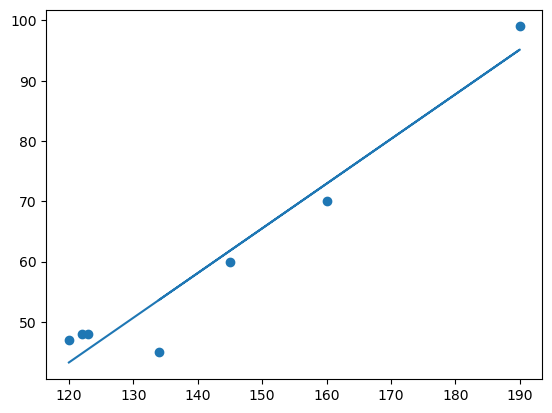

In [14]:
# Visuzaling the training set result

#plotting and checking

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

### Step 3: Prediction of test set result

In [15]:
y_pred = regression.predict(X_test)
#x_pred = regression.predict(y_test)
y_pred , y_test

(array([87.7488234 , 54.38085584, 60.31293896]),
 8    98
 1    58
 5    67
 Name: Weight, dtype: int64)

y_pred = array)[87.7488234, 54.38085584, 60.31293896]) - predicted values - predicted weights for the corresponding samples in the test set

y_test =

         8   98

         1   58
         
         5   67  
         
         -contains the actual weights for those samples  

sample - represents the index of the data points in the test set.When you split your data into training and testing sets, each data point retains its original index or identifier.

In this example, the indices 8, 1, and 5 represent the original indices of the data points in your test set. These indices could correspond to specific individuals or observations in your dataset.

8th index has - 98 as true weight

1st index has - 58 as true weight and 

5th index has - 67 as true weight

In [16]:
# to check the samples in the test set 

import pandas as pd

# Assuming y_test is a pandas Series
y_test = pd.Series([98, 58, 67], name='Weight')

# Create a DataFrame with the samples, predicted values, and true values
results_df = pd.DataFrame({
    'Sample': y_test.index,
    'Predicted Weight': y_pred,
    'True Weight': y_test.values
})

# Display the DataFrame
print(results_df)


   Sample  Predicted Weight  True Weight
0       0         87.748823           98
1       1         54.380856           58
2       2         60.312939           67


In [17]:
##Step - 5 : visuzalizing the test set results

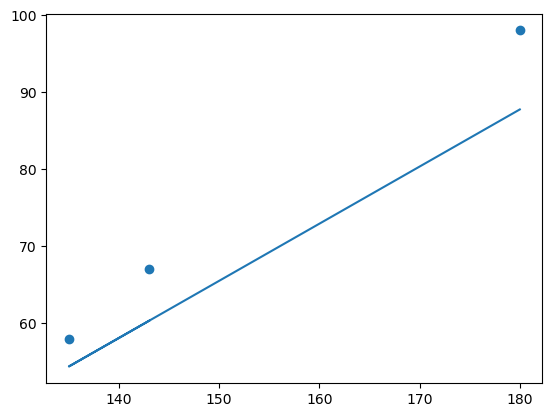

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regression.predict(X_test))

### Performance metrics

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

54.30053714498595
6.852460599039413
7.36888981767172


In [20]:
from sklearn.metrics import r2_score

In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.8150246652896012

In [22]:
##adjusted r2 = 1-|(1-R2)*(n-1)(n-p-1)|

AR2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
AR2

0.6300493305792023

In [29]:
#OLS using statsmodel for training set

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              301.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                    2.34e-06
Time:                        18:08:45   Log-Likelihood:                         -25.077
No. Observations:                   7   AIC:                                      52.15
Df Residuals:                       6   BIC:                                      52.10
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Dependent Variable:

The variable that you are trying to predict. In this case, it's "Weight."

#### Model Information:

#### Model Type: 

OLS (Ordinary Least Squares), indicating a linear regression model.
#### Method: 

Least Squares, the technique used for parameter estimation.
Date and Time: When the model was run or generated.

#### Model Fit:

#### R-squared (uncentered):

A measure of how well the independent variable(s) explain the variance in the dependent variable. It ranges from 0 to 1, and a higher value indicates a better fit. In this case, it's 0.980.

#### Adjusted R-squared (uncentered): 

Similar to R-squared, but adjusted for the number of predictors. It penalizes the inclusion of unnecessary predictors. Here, it's 0.977.

#### Model Evaluation:

#### F-statistic:
A measure of the overall significance of the model. Higher values suggest a more significant relationship between the independent and dependent variables.
#### Prob (F-statistic): 
The probability associated with the F-statistic. A low p-value (typically below 0.05) indicates that the model is statistically significant.

#### Coefficients:

#### coef (Coefficient):
The estimated coefficient for the independent variable "Height" in this case. It represents the change in the dependent variable (Weight) for a one-unit change in the independent variable (Height).
#### std err (Standard Error): 
The standard error associated with the coefficient estimate.
#### t-statistic:
The t-statistic is the ratio of the coefficient to its standard error. It assesses the significance of the coefficient.
#### P>|t| (p-value): 
The p-value associated with the t-statistic. Low p-values indicate that the coefficient is likely significant.
[0.025, 0.975]: The confidence interval for the coefficient estimate.

#### Model Diagnostics:

#### Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis: 
Various statistics related to model diagnostics. These can be used to assess assumptions of normality, autocorrelation, and other properties of the residuals.
#### Prob(Omnibus), Prob(JB):'
Probabilities associated with the Omnibus and Jarque-Bera tests. Low values indicate that the residuals may not be normally distributed.

#### Other Information:

#### Df Residuals: Degrees of freedom of the residuals.
#### AIC (Akaike Information Criterion): 
A measure of the model's goodness of fit, penalizing models with more parameters.
#### BIC (Bayesian Information Criterion): 
Similar to AIC but with a different penalty term.

### Notes:

[1] R² is computed without centering (uncentered): Indicates that the R-squared is computed without subtracting the mean from the dependent variable.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified: Assumption about the covariance structure of the errors.
The warning at the end (ValueWarning) mentions that certain statistical tests are not valid with fewer than 8 observations, and it indicates that there are 7 observations in the dataset

In [31]:
#ols for dependent and independent variables
model = sm.OLS(Y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              436.0
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                    6.21e-09
Time:                        18:10:03   Log-Likelihood:                         -36.700
No. Observations:                  10   AIC:                                      75.40
Df Residuals:                       9   BIC:                                      75.70
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------